In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Assignment3-Breast-Cancer-Diagnose.csv')

# Display the first few rows to understand its structure
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
# Convert 'diagnosis' to binary format
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
X = data.drop(['id', 'diagnosis'], axis=1)  # Features
y = data['diagnosis']  # Target variable

In [ ]:
# Split into training and test set
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the classifiers
lr = LogisticRegression(max_iter=10000)
svm = SVC()
rf = RandomForestClassifier()

In [ ]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Fit on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_imputed = imputer.fit_transform(X)
# Check for and replace infinite values
X_imputed = np.nan_to_num(X_imputed, nan=np.nanmean(X_imputed), posinf=np.max(X_imputed), neginf=np.min(X_imputed))


In [ ]:
# Split the data again after imputation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
}

In [ ]:
# Initialize and fit GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'n_estimators': 200}


In [ ]:
# Train the models with the best parameters or default for comparison
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Random Forest Accuracy: {accuracy_rf}")

Logistic Regression Accuracy: 0.956140350877193
SVM Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.956140350877193


In [ ]:
# Classifier names
classifiers = ['Logistic Regression', 'SVM', 'Random Forest']


In [ ]:
# Accuracy scores
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf]

(0.9, 1.0)

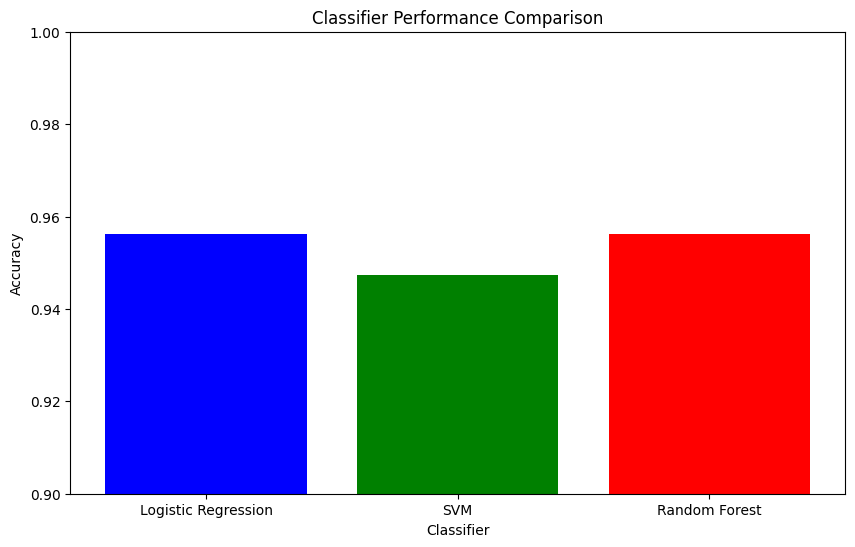

In [ ]:
# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])

plt.title('Classifier Performance Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])  # Adjust based on your accuracies range